# Predicting the Success of Mergers and Acquisition Deals Using Machine Learning Techniques 

This codebase is focused on working with mergers and acquisitions data. 
Particularly, the data used were sourced from the Australian Exchange Commision (ASX).

##### Here's a map of how the codebase is structured:
    1. Importing neccessary libraries and dependencies
    2. Data Exploration and Engineering
    3. Exploring correlation between features
    4. Developing machine learning Models:
    - Experiment 1
    - Experiment 2
    - Experiment 3      


### Importing neccessary libraries and dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE



In [2]:
pip install --user --upgrade scikit-learn==1.2.0

Requirement already up-to-date: scikit-learn==1.2.0 in c:\users\acer\appdata\roaming\python\python38\site-packages (1.2.0)Note: you may need to restart the kernel to use updated packages.



### Data Exploration and Engineering

In [3]:
# Import raw data
raw_data = pd.read_excel("ma_data.xlsx")

In [4]:
#Number of Rows and Columns
raw_data.shape

(13667, 13)

In [5]:
#Column Names
raw_data.head(2)

,Unnamed: 0,Return on Assets %,Return on Capital %,Return on Equity %,Return on Investment Capital %,Current Ratio,Quick Ratio,Cash from Ops. To Curr. Liab.,Total Liabilities/Total Assets %,"Total Assets, 1 yr Growth %",Buy-L2,Sell-L2,Category
0,ASX: TFL,-4.76,-4.94,6.81,7.04,16.29,16.17,-1.51,3.28,56.51,0,0,PUT
1,ASX: TGA,9.11,12.45,21.13,10.85,0.76,0.74,0.27,35.82,5.86,0,0,PUT


In [6]:
#Check for missing or NaN values
raw_data.isna().any()

Unnamed: 0                          False
Return on Assets %                  False
Return on Capital %                 False
Return on Equity %                  False
Return on Investment Capital %      False
Current Ratio                       False
Quick Ratio                         False
Cash from Ops. To Curr. Liab.       False
Total Liabilities/Total Assets %    False
Total Assets, 1 yr Growth %         False
Buy-L2                              False
Sell-L2                             False
Category                            False
dtype: bool

In [7]:
#Data types for each columns
raw_data.dtypes

Unnamed: 0                           object
Return on Assets %                  float64
Return on Capital %                 float64
Return on Equity %                  float64
Return on Investment Capital %      float64
Current Ratio                       float64
Quick Ratio                         float64
Cash from Ops. To Curr. Liab.       float64
Total Liabilities/Total Assets %    float64
Total Assets, 1 yr Growth %         float64
Buy-L2                                int64
Sell-L2                               int64
Category                             object
dtype: object

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13667 entries, 0 to 13666
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        13667 non-null  object 
 1   Return on Assets %                13667 non-null  float64
 2   Return on Capital %               13667 non-null  float64
 3   Return on Equity %                13667 non-null  float64
 4   Return on Investment Capital %    13667 non-null  float64
 5   Current Ratio                     13667 non-null  float64
 6   Quick Ratio                       13667 non-null  float64
 7   Cash from Ops. To Curr. Liab.     13667 non-null  float64
 8   Total Liabilities/Total Assets %  13667 non-null  float64
 9   Total Assets, 1 yr Growth %       13667 non-null  float64
 10  Buy-L2                            13667 non-null  int64  
 11  Sell-L2                           13667 non-null  int64  
 12  Cate

In [9]:
#Checking the range of numerical values
raw_data.describe()

,Return on Assets %,Return on Capital %,Return on Equity %,Return on Investment Capital %,Current Ratio,Quick Ratio,Cash from Ops. To Curr. Liab.,Total Liabilities/Total Assets %,"Total Assets, 1 yr Growth %",Buy-L2,Sell-L2
count,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,1.366700e+04,13667.000000,13667.000000
mean,-11.891304,-20.095430,-59.927297,-40.310243,10.187402,9.063800,-1.593574,31.625950,1.514117e+04,0.071706,0.050194
std,35.758716,518.181355,1327.680956,759.105059,67.494989,33.614065,14.177132,86.228863,1.359056e+06,0.383103,0.353483
min,-2091.100000,-60151.440000,-122406.160000,-87739.040000,0.010000,-0.040000,-777.550000,0.010000,-9.999000e+01,0.000000,0.000000
25%,-16.985000,-19.720000,-39.860000,-37.410000,1.260000,0.840000,-2.650000,6.430000,-1.128000e+01,0.000000,0.000000
50%,-3.770000,-4.220000,-8.590000,-8.530000,2.560000,1.980000,-0.330000,22.520000,4.510000e+00,0.000000,0.000000
75%,4.190000,5.300000,8.910000,2.970000,7.455000,6.835000,0.380000,46.465000,3.120000e+01,0.000000,0.000000
max,156.060000,278.540000,1508.630000,1297.410000,6823.710000,1492.430000,490.160000,5819.100000,1.537289e+08,9.000000,11.000000


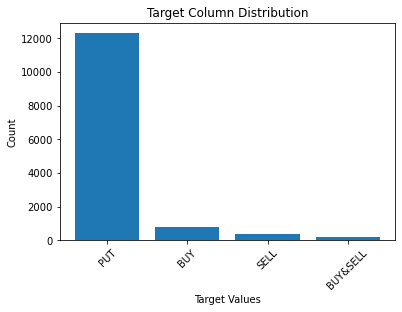

In [10]:
# Replace 'target_column' with the actual name of your target column
target_column = 'Category'

# Count the occurrences of each value in the target column
target_counts = raw_data[target_column].value_counts()

# Plot the target column distribution
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.title('Target Column Distribution')
plt.xticks(rotation=45)  
plt.show()

In [11]:
# Convert the categories to ONLY two - transaction happended and not happended
raw_data = raw_data.replace(to_replace=['BUY', 'SELL', 'BUY&SELL'], value='DEAL')

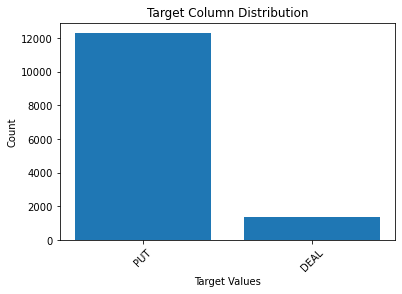

In [12]:
# Replace 'target_column' with the actual name of your target column
target_column = 'Category'

# Count the occurrences of each value in the target column
target_counts = raw_data[target_column].value_counts()

# Plot the target column distribution
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.title('Target Column Distribution')
plt.xticks(rotation=45) 
plt.show()

In [13]:
# Set Category column as the target
X = raw_data.iloc[:, 1:12].values

# Preparing the dependent variable
y = raw_data.iloc[:, 12].values

# Converting category column to Ones and Zeros using LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### Exploring correlation between features

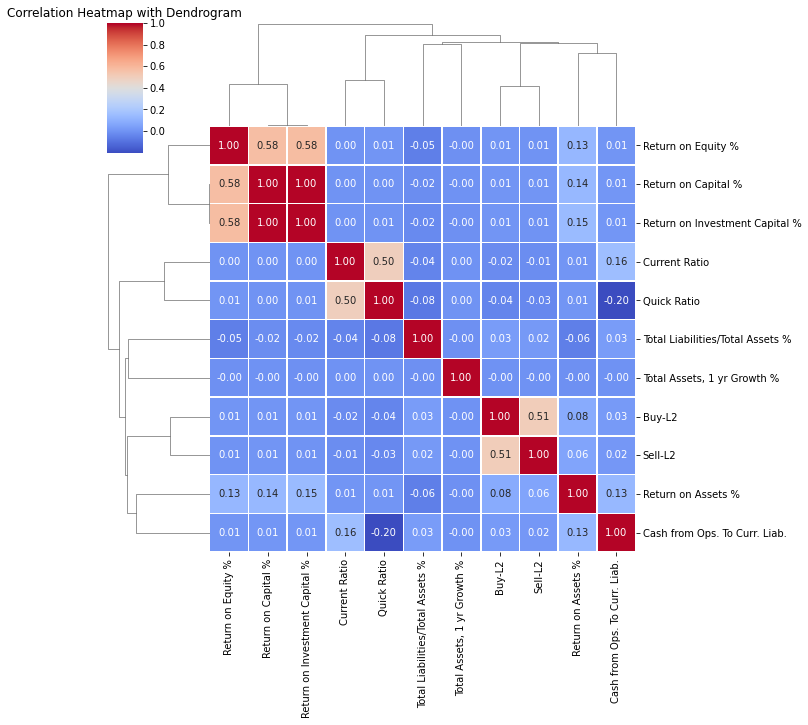

In [14]:
# Calculate the Pearson correlation matrix for the features
correlation_matrix = raw_data.iloc[:, 1:12].corr()

# # Create a heatmap for the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Pearson Correlation Heatmap')
# plt.show()


sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with Dendrogram')
plt.show()

### Developing machine learning models

### Experiment 1

#### Randomly picking 1000 data point from the target and setting it as the test data. The raw data is then augumented and set as training dataset.

In [15]:
# Create an array of indices for each class
#Splited the values (0 and 1s) in the target column into seperate variables
indices_class_0 = np.where(y == 0)[0]
indices_class_1 = np.where(y == 1)[0]

# Randomly select 1000 samples from each class for the test set
test_size_per_class = 1000
test_indices_class_0 = np.random.choice(indices_class_0, size=test_size_per_class, replace=False)
test_indices_class_1 = np.random.choice(indices_class_1, size=test_size_per_class, replace=False)

# Combine the indices to get the final test set indices
test_indices = np.concatenate((test_indices_class_0, test_indices_class_1))

# Get the remaining indices for the training set
train_indices = np.setdiff1d(np.arange(len(y)), test_indices)

# Split the data into training and test sets using the indices
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

In [16]:
# Check the distribution of classes in the test set
unique_classes_test, counts_test = np.unique(y_test, return_counts=True)
print("Class distribution in the test set:", dict(zip(unique_classes_test, counts_test)))

Class distribution in the test set: {0: 1000, 1: 1000}


In [17]:
# Check the class distribution in the training set before applying SMOTE
print("Class distribution in the training set (Before SMOTE):")
print("Class 0:", np.sum(y_train == 0))
print("Class 1:", np.sum(y_train == 1))

Class distribution in the training set (Before SMOTE):
Class 0: 359
Class 1: 11308


In [18]:
# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the class distribution in the training set after applying SMOTE
print("Class distribution in the training set (After SMOTE):")
print("Class 0:", np.sum(y_train_balanced == 0))
print("Class 1:", np.sum(y_train_balanced == 1))

Class distribution in the training set (After SMOTE):
Class 0: 11308
Class 1: 11308


In [19]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
# Create Random Forest classifier object
classifier = RandomForestClassifier(n_estimators=300, criterion='gini', random_state=0)

# Train the model using the training sets
classifier.fit(X_train, y_train)

# Predict output for both training and test datasets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate evaluation metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print evaluation metrics for both train and test data
print("Evaluation metrics for the training data:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("Confusion Matrix:")
print(train_confusion_matrix)
print("Classification Report:")
print(train_classification_report)

print("\nEvaluation metrics for the test data:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)
print("Confusion Matrix:")
print(test_confusion_matrix)
print("Classification Report:")
print(test_classification_report)


Evaluation metrics for the training data:
Accuracy: 0.9990571697951487
Precision: 0.9990580860538513
Recall: 0.9990571697951487
F1-score: 0.9990500643656289
Confusion Matrix:
[[  348    11]
 [    0 11308]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       359
           1       1.00      1.00      1.00     11308

    accuracy                           1.00     11667
   macro avg       1.00      0.98      0.99     11667
weighted avg       1.00      1.00      1.00     11667


Evaluation metrics for the test data:
Accuracy: 0.787
Precision: 0.8491841015383568
Recall: 0.787
F1-score: 0.7770751633473892
Confusion Matrix:
[[576 424]
 [  2 998]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.58      0.73      1000
           1       0.70      1.00      0.82      1000

    accuracy                           0.79      2000
   macro avg       0.85      0.79 

In [21]:
# Feature Importance Analysis
feature_importance = classifier.feature_importances_


# Print Feature Importance
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")



Feature Importance:
Feature 1: 0.05553145059792498
Feature 2: 0.05468313919235434
Feature 3: 0.05220421414601368
Feature 4: 0.05211204377858314
Feature 5: 0.04964794412983223
Feature 6: 0.049107872936556
Feature 7: 0.047619868010964406
Feature 8: 0.05549552731233939
Feature 9: 0.04862761760953653
Feature 10: 0.34760446056752603
Feature 11: 0.18736586171836925



Feature Importance:
Feature 1: 0.05553145059792498
Feature 2: 0.05468313919235434
Feature 3: 0.05220421414601368
Feature 4: 0.05211204377858314
Feature 5: 0.04964794412983223
Feature 6: 0.049107872936556
Feature 7: 0.047619868010964406
Feature 8: 0.05549552731233939
Feature 9: 0.04862761760953653
Feature 10: 0.34760446056752603
Feature 11: 0.18736586171836925


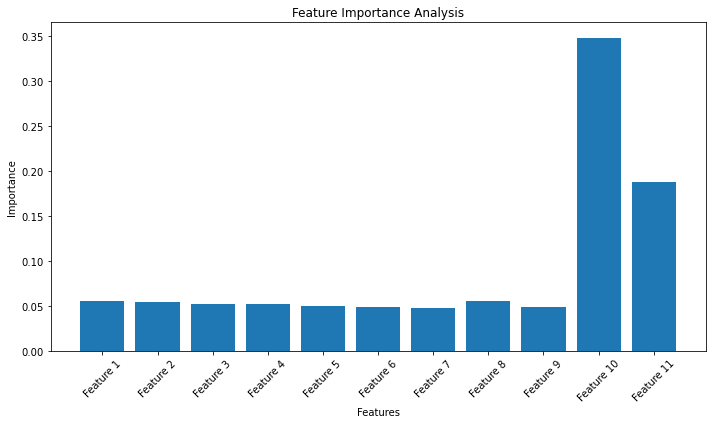

In [22]:
# Print Feature Importance
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=[f"Feature {i+1}" for i in range(len(feature_importance))])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Analysis')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

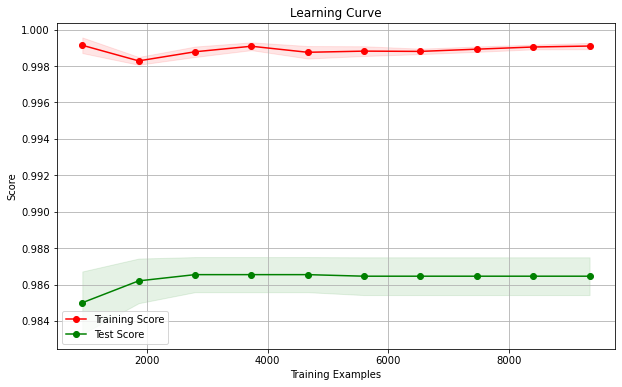

In [23]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test Score')
plt.legend(loc='best')
plt.show()

In [24]:
# Create logistic regression object
logreg = LogisticRegression()

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Predict output for both training and test datasets
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate evaluation metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print evaluation metrics for both train and test data
print("Evaluation metrics for the training data:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("Confusion Matrix:")
print(train_confusion_matrix)
print("Classification Report:")
print(train_classification_report)

print("\nEvaluation metrics for the test data:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)
print("Confusion Matrix:")
print(test_confusion_matrix)
print("Classification Report:")
print(test_classification_report)


Evaluation metrics for the training data:
Accuracy: 0.9867146652952773
Precision: 0.9868943064781467
Recall: 0.9867146652952773
F1-score: 0.9849310829968775
Confusion Matrix:
[[  204   155]
 [    0 11308]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.72       359
           1       0.99      1.00      0.99     11308

    accuracy                           0.99     11667
   macro avg       0.99      0.78      0.86     11667
weighted avg       0.99      0.99      0.98     11667


Evaluation metrics for the test data:
Accuracy: 0.788
Precision: 0.851123595505618
Recall: 0.788
F1-score: 0.7780234876279506
Confusion Matrix:
[[ 576  424]
 [   0 1000]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.58      0.73      1000
           1       0.70      1.00      0.83      1000

    accuracy                           0.79      2000
   macro avg       0.85      0.


Feature Importance:
Feature 1: 0.05553145059792498
Feature 2: 0.05468313919235434
Feature 3: 0.05220421414601368
Feature 4: 0.05211204377858314
Feature 5: 0.04964794412983223
Feature 6: 0.049107872936556
Feature 7: 0.047619868010964406
Feature 8: 0.05549552731233939
Feature 9: 0.04862761760953653
Feature 10: 0.34760446056752603
Feature 11: 0.18736586171836925


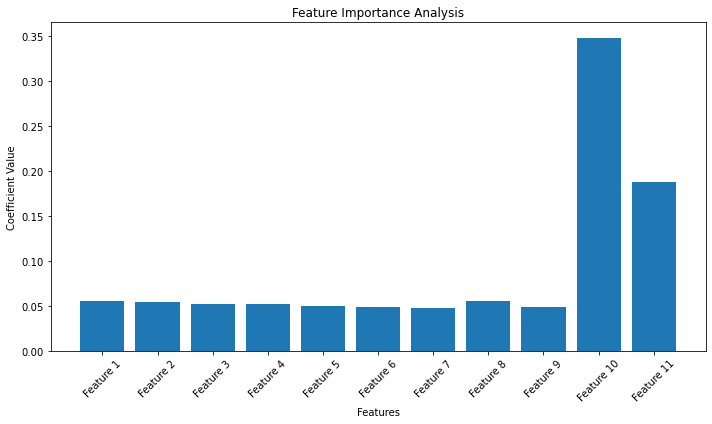

In [25]:
# Print Feature Importance
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance Analysis')
plt.xticks(range(len(feature_importance)), [f"Feature {i+1}" for i in range(len(feature_importance))], rotation=45)
plt.tight_layout()

plt.show()


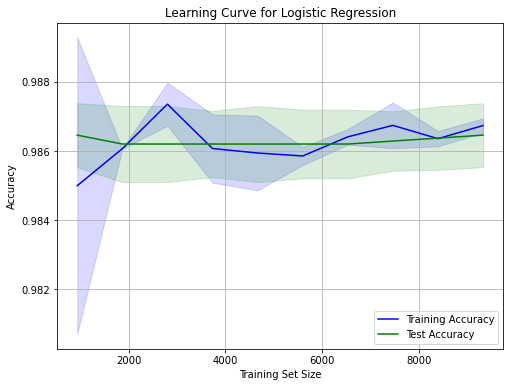

In [26]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    logreg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'
)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Test Accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Experiment 2

### Run data augumentation on the raw data before spliting

In [27]:
# Set Category column as the target
X = raw_data.iloc[:, 1:12].values

# Preparing the dependent variable
y = raw_data.iloc[:, 12].values

# Converting category column to Ones and Zeros using LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [28]:
# Apply SMOTE to augment the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

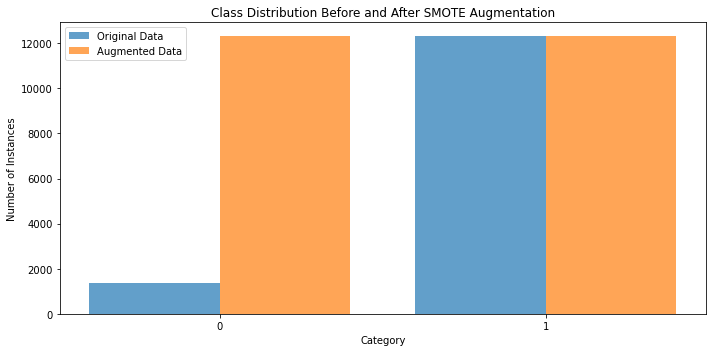

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Count the occurrences of each class in the original data
unique_classes, class_counts = np.unique(y, return_counts=True)

# Count the occurrences of each class in the augmented data
unique_classes_augmented, class_counts_augmented = np.unique(y_resampled, return_counts=True)

# Create bar chart to visualize class distribution before and after augmentation
plt.figure(figsize=(10, 5))
plt.bar(unique_classes, class_counts, width=0.4, label='Original Data', align='center', alpha=0.7)
plt.bar(unique_classes_augmented + 0.4, class_counts_augmented, width=0.4, label='Augmented Data', align='center', alpha=0.7)
plt.xticks(unique_classes + 0.2, labels=unique_classes)
plt.xlabel('Category')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After SMOTE Augmentation')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [31]:
#Split the augmented data into 80/20 training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [32]:
# Create Random Forest classifier object
classifier = RandomForestClassifier(n_estimators=300, criterion='gini', random_state=0)

# Train the model using the training sets
classifier.fit(X_train, y_train)

# Predict output for both training and test datasets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate evaluation metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print evaluation metrics for both train and test data
print("Evaluation metrics for the training data:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("Confusion Matrix:")
print(train_confusion_matrix)
print("Classification Report:")
print(train_classification_report)

print("\nEvaluation metrics for the test data:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)
print("Confusion Matrix:")
print(test_confusion_matrix)
print("Classification Report:")
print(test_classification_report)

Evaluation metrics for the training data:
Accuracy: 0.9981210643916312
Precision: 0.9981210687740667
Recall: 0.9981210643916312
F1-score: 0.998121064008836
Confusion Matrix:
[[9867   18]
 [  19 9788]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9885
           1       1.00      1.00      1.00      9807

    accuracy                           1.00     19692
   macro avg       1.00      1.00      1.00     19692
weighted avg       1.00      1.00      1.00     19692


Evaluation metrics for the test data:
Accuracy: 0.9579610073111292
Precision: 0.9601398556157204
Recall: 0.9579610073111292
F1-score: 0.9578869916427855
Confusion Matrix:
[[2234  189]
 [  18 2483]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2423
           1       0.93      0.99      0.96      2501

    accuracy                           0.96      4924
   macro 


Feature Importance:
Feature 1: 0.062379706135354124
Feature 2: 0.05776028763767914
Feature 3: 0.05136250632271848
Feature 4: 0.047945296045653535
Feature 5: 0.04359724828518685
Feature 6: 0.043905933091210145
Feature 7: 0.07249945337945903
Feature 8: 0.05210302865215103
Feature 9: 0.05430040446172595
Feature 10: 0.3522882880403938
Feature 11: 0.1618578479484679


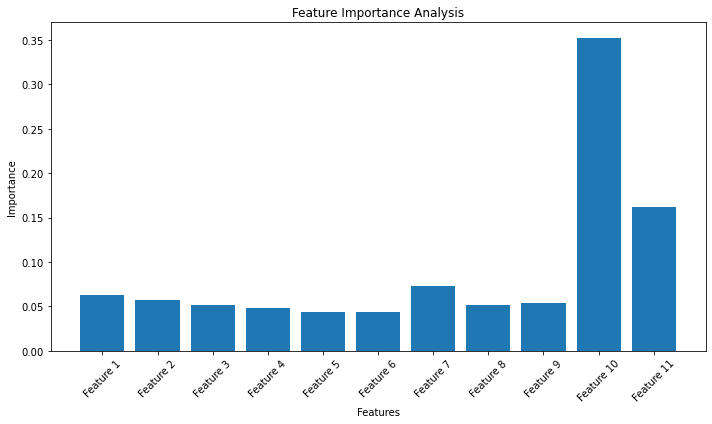

In [33]:
# Feature Importance Analysis
feature_importance = classifier.feature_importances_

# Print Feature Importance
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=[f"Feature {i+1}" for i in range(len(feature_importance))])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Analysis')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

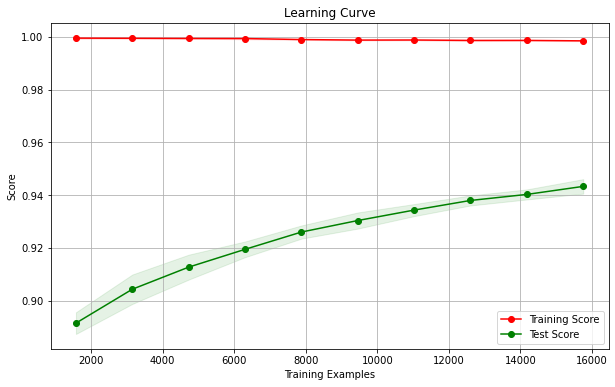

In [34]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test Score')
plt.legend(loc='best')
plt.show()

In [35]:
# Create logistic regression object
logreg = LogisticRegression()

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Predict output for both training and test datasets
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate evaluation metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print evaluation metrics for both train and test data
print("Evaluation metrics for the training data:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("Confusion Matrix:")
print(train_confusion_matrix)
print("Classification Report:")
print(train_classification_report)

print("\nEvaluation metrics for the test data:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)
print("Confusion Matrix:")
print(test_confusion_matrix)
print("Classification Report:")
print(test_classification_report)

Evaluation metrics for the training data:
Accuracy: 0.6876396506195409
Precision: 0.6967949477116107
Recall: 0.6876396506195409
F1-score: 0.6837201530107121
Confusion Matrix:
[[7886 1999]
 [4152 5655]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.80      0.72      9885
           1       0.74      0.58      0.65      9807

    accuracy                           0.69     19692
   macro avg       0.70      0.69      0.68     19692
weighted avg       0.70      0.69      0.68     19692


Evaluation metrics for the test data:
Accuracy: 0.6766856214459789
Precision: 0.6891536626393342
Recall: 0.6766856214459789
F1-score: 0.6724309794553355
Confusion Matrix:
[[1928  495]
 [1097 1404]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      2423
           1       0.74      0.56      0.64      2501

    accuracy                           0.68      4924
   macro


Feature Importance:
Feature 1: -0.011495241616245974
Feature 2: -0.010339507516050908
Feature 3: 3.32850757858695e-05
Feature 4: -0.0015561539521254078
Feature 5: 0.008180857276765333
Feature 6: 0.008300610679286047
Feature 7: -0.0023851381080277336
Feature 8: -0.008262258259176682
Feature 9: 2.9293836659450898e-08
Feature 10: -0.0024248793908707724
Feature 11: -0.0017173257764341975


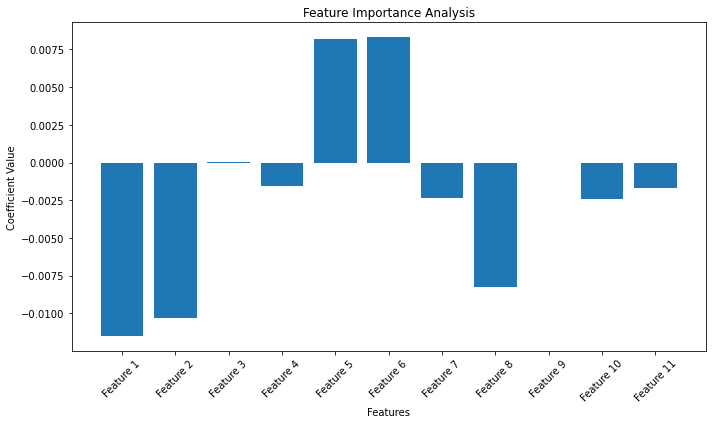

In [36]:
# Feature Importance Analysis
feature_importance = logreg.coef_[0]

# Print Feature Importance
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance Analysis')
plt.xticks(range(len(feature_importance)), [f"Feature {i+1}" for i in range(len(feature_importance))], rotation=45)
plt.tight_layout()

plt.show()

C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

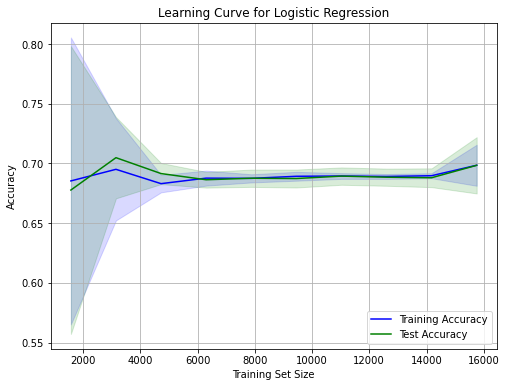

In [37]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    logreg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'
)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Test Accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Experiment 3

### Extract a subset of the data to the level where both categories are eqaul and therefore balanced. This will mean the data we are using is smaller.

In [38]:
# Set Category column as the target
X = raw_data.iloc[:, 1:12].values

# Preparing the dependent variable
y = raw_data.iloc[:, 12].values

# Converting category column to Ones and Zeros using LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [39]:
import numpy as np

# Find the indices of data instances for each category (assuming you have binary categories 0 and 1)
category_0_indices = np.where(y == 0)[0]
category_1_indices = np.where(y == 1)[0]

# Pick 1500 data instances from each category
num_instances_per_category = 1350
selected_indices_category_0 = np.random.choice(category_0_indices, num_instances_per_category, replace=False)
selected_indices_category_1 = np.random.choice(category_1_indices, num_instances_per_category, replace=False)

# Combine the selected data instances from both categories
selected_indices_combined = np.concatenate((selected_indices_category_0, selected_indices_category_1))

# Get the corresponding features and target for the selected instances
X_selected = X[selected_indices_combined]
y_selected = y[selected_indices_combined]

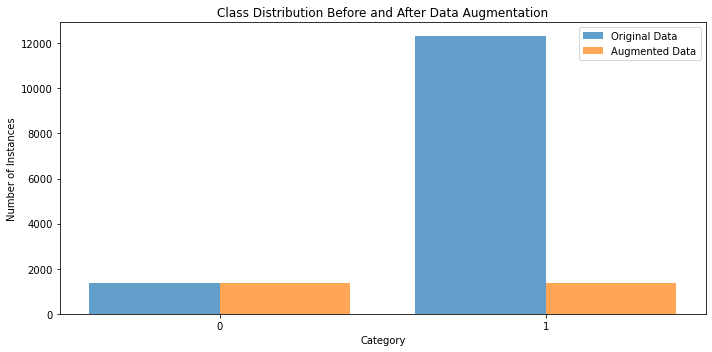

In [40]:
# Count the occurrences of each class in the original data
unique_classes, class_counts = np.unique(y, return_counts=True)

# Count the occurrences of each class in the augmented data
unique_classes_augmented, class_counts_augmented = np.unique(y_selected, return_counts=True)

# Create bar chart to visualize class distribution before and after augmentation
plt.figure(figsize=(10, 5))
plt.bar(unique_classes, class_counts, width=0.4, label='Original Data', align='center', alpha=0.7)
plt.bar(unique_classes_augmented + 0.4, class_counts_augmented, width=0.4, label='Augmented Data', align='center', alpha=0.7)
plt.xticks(unique_classes + 0.2, labels=unique_classes)
plt.xlabel('Category')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Before and After Data Augmentation')
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
# Split the combined dataset into train and test sets
test_size = 0.2  
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=test_size, random_state=random_state)

# Print the shapes to verify the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2160, 11)
y_train shape: (2160,)
X_test shape: (540, 11)
y_test shape: (540,)


In [42]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [43]:
# Create Random Forest classifier object
classifier = RandomForestClassifier(n_estimators=300, criterion='gini', random_state=0)

# Train the model using the training sets
classifier.fit(X_train, y_train)

# Predict output for both training and test datasets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate evaluation metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print evaluation metrics for both train and test data
print("Evaluation metrics for the training data:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("Confusion Matrix:")
print(train_confusion_matrix)
print("Classification Report:")
print(train_classification_report)

print("\nEvaluation metrics for the test data:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)
print("Confusion Matrix:")
print(test_confusion_matrix)
print("Classification Report:")
print(test_classification_report)

Evaluation metrics for the training data:
Accuracy: 0.9990740740740741
Precision: 0.9990757699091032
Recall: 0.9990740740740741
F1-score: 0.9990740653410133
Confusion Matrix:
[[1068    2]
 [   0 1090]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1070
           1       1.00      1.00      1.00      1090

    accuracy                           1.00      2160
   macro avg       1.00      1.00      1.00      2160
weighted avg       1.00      1.00      1.00      2160


Evaluation metrics for the test data:
Accuracy: 0.7648148148148148
Precision: 0.7716773240857671
Recall: 0.7648148148148148
F1-score: 0.7642164326536955
Confusion Matrix:
[[197  83]
 [ 44 216]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       280
           1       0.72      0.83      0.77       260

    accuracy                           0.76       540
   macro avg


Feature Importance:
Feature 1: 0.08929713250166227
Feature 2: 0.0857229451125686
Feature 3: 0.07068614007690234
Feature 4: 0.06936786973136194
Feature 5: 0.06786209818144102
Feature 6: 0.0736468178573682
Feature 7: 0.09833229952312345
Feature 8: 0.08174742681098236
Feature 9: 0.06922017578146233
Feature 10: 0.20484456408973922
Feature 11: 0.08927253033338838


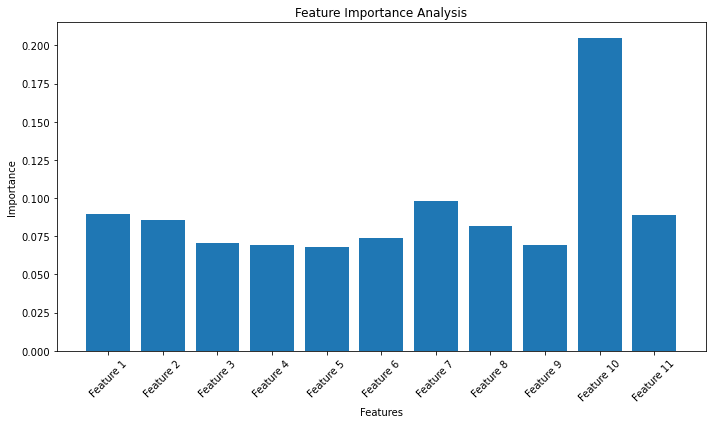

In [44]:
# Feature Importance Analysis
feature_importance = classifier.feature_importances_

# Print Feature Importance
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=[f"Feature {i+1}" for i in range(len(feature_importance))])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Analysis')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

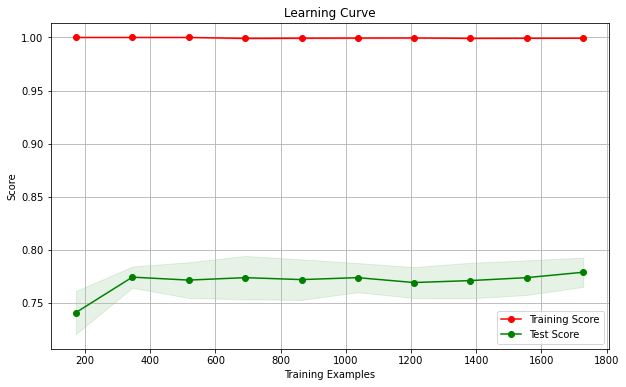

In [45]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test Score')
plt.legend(loc='best')
plt.show()

In [46]:
# Create logistic regression object
logreg = LogisticRegression()

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Predict output for both training and test datasets
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate evaluation metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print evaluation metrics for both train and test data
print("Evaluation metrics for the training data:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("Confusion Matrix:")
print(train_confusion_matrix)
print("Classification Report:")
print(train_classification_report)

print("\nEvaluation metrics for the test data:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)
print("Confusion Matrix:")
print(test_confusion_matrix)
print("Classification Report:")
print(test_classification_report)

Evaluation metrics for the training data:
Accuracy: 0.7796296296296297
Precision: 0.8366374625326448
Recall: 0.7796296296296297
F1-score: 0.7693336932760876
Confusion Matrix:
[[ 609  461]
 [  15 1075]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.57      0.72      1070
           1       0.70      0.99      0.82      1090

    accuracy                           0.78      2160
   macro avg       0.84      0.78      0.77      2160
weighted avg       0.84      0.78      0.77      2160


Evaluation metrics for the test data:
Accuracy: 0.7944444444444444
Precision: 0.8486453576864535
Recall: 0.7944444444444444
F1-score: 0.7879931623931625
Confusion Matrix:
[[172 108]
 [  3 257]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.61      0.76       280
           1       0.70      0.99      0.82       260

    accuracy                           0.79       540
   macro avg


Feature Importance:
Feature 1: -0.37346035821898443
Feature 2: -0.053858826108097106
Feature 3: -0.2994841866437151
Feature 4: 0.007209706965343658
Feature 5: -0.7837521959616474
Feature 6: 0.7612163349262572
Feature 7: 0.009820710152918502
Feature 8: -1.0737943954885973
Feature 9: 0.01814883091335723
Feature 10: -3.6850273484708063
Feature 11: -2.986603260400603


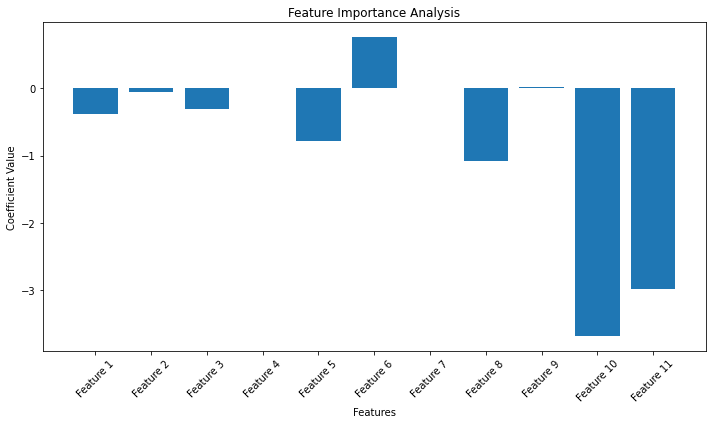

In [47]:
# Feature Importance Analysis
feature_importance = logreg.coef_[0]

# Print Feature Importance
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance Analysis')
plt.xticks(range(len(feature_importance)), [f"Feature {i+1}" for i in range(len(feature_importance))], rotation=45)
plt.tight_layout()

plt.show()

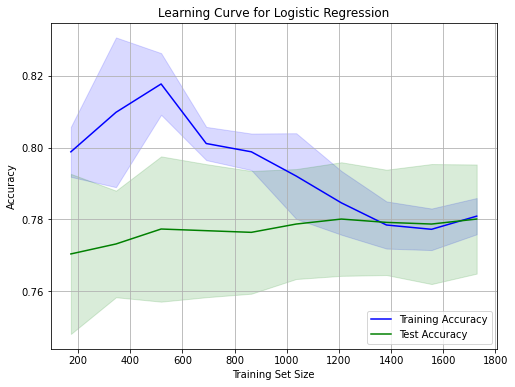

In [48]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    logreg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'
)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Test Accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Below, we double down on experiment 3 by trying XG Boost, another machine learning model

In [49]:
# Set Category column as the target
X = raw_data.iloc[:, 1:12].values

# Preparing the dependent variable
y = raw_data.iloc[:, 12].values

# Converting category column to Ones and Zeros using LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [50]:
!pip install xgboost

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model object
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model using the training sets
xgb_model.fit(X_train, y_train)

# Predict output for both training and test datasets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics for the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print evaluation metrics for both train and test data
print("Evaluation metrics for the training data:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)
print("Confusion Matrix:")
print(train_confusion_matrix)
print("Classification Report:")
print(train_classification_report)

print("\nEvaluation metrics for the test data:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)
print("Confusion Matrix:")
print(test_confusion_matrix)
print("Classification Report:")
print(test_classification_report)


Evaluation metrics for the training data:
Accuracy: 0.977316381597
Precision: 0.9778736413655926
Recall: 0.977316381597
F1-score: 0.9759954910843736
Confusion Matrix:
[[ 838  248]
 [   0 9847]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1086
           1       0.98      1.00      0.99      9847

    accuracy                           0.98     10933
   macro avg       0.99      0.89      0.93     10933
weighted avg       0.98      0.98      0.98     10933


Evaluation metrics for the test data:
Accuracy: 0.9575713240673006
Precision: 0.958335868708231
Recall: 0.9575713240673006
F1-score: 0.9527958881378185
Confusion Matrix:
[[ 161  112]
 [   4 2457]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.59      0.74       273
           1       0.96      1.00      0.98      2461

    accuracy                           0.96      2734
   macro avg     

<Figure size 720x432 with 0 Axes>

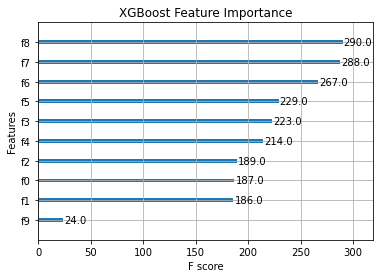


Feature Importance:
Feature 1: 0.00895736925303936
Feature 2: 0.00872888509184122
Feature 3: 0.00917025562375784
Feature 4: 0.00890131015330553
Feature 5: 0.009139779955148697
Feature 6: 0.009624912403523922
Feature 7: 0.010113907046616077
Feature 8: 0.009409652091562748
Feature 9: 0.008325668051838875
Feature 10: 0.7643351554870605
Feature 11: 0.1532931625843048


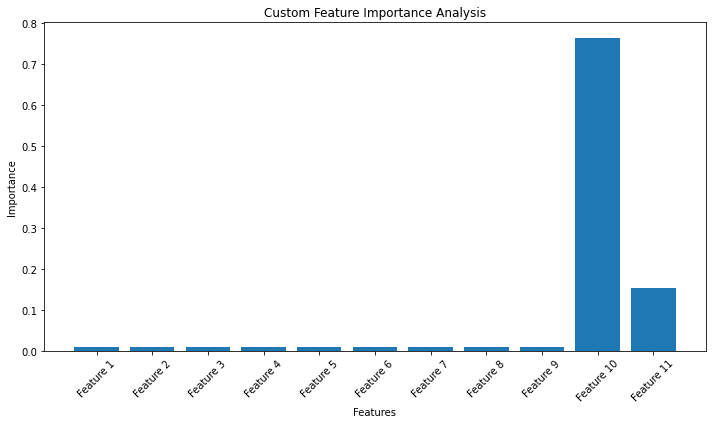

In [52]:
# Plot Feature Importance

# Plot Feature Importance using XGBoost's built-in function
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('XGBoost Feature Importance')
plt.show()

# Access Feature Importance Scores
feature_importance = xgb_model.feature_importances_
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance}")

# Create a custom bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Custom Feature Importance Analysis')
plt.xticks(range(len(feature_importance)), [f"Feature {i+1}" for i in range(len(feature_importance))], rotation=45)
plt.tight_layout()

plt.show()

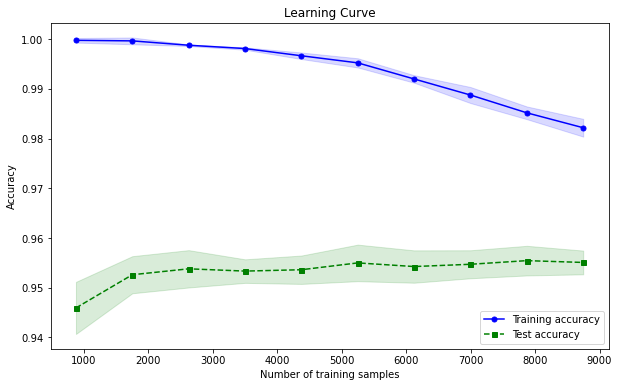

In [53]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Test accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()
